## IS-4100: Web Scraping NFL Draft Data

## Overview:
In this lab, you will learn how to gather NFL draft and scouting data from various websites through web scraping, perform exploratory data analysis (EDA), and build a machine learning model to predict player success in the NFL. You will use **Python / R**, with libraries such as **BeautifulSoup**, **RSelenium**, and **requests** for scraping, **pandas** (Python) or **dplyr** and **tidyverse** (R) for data manipulation, and **scikit-learn** (Python) or **caret** (R) for model building.

## Objectives:
- Learn web scraping techniques using Python or R.
- Perform exploratory data analysis (EDA) on NFL draft data.
- Build a predictive model to analyze draft data and predict player success (e.g., Pro Bowl appearances, number of career games, or player performance ratings).
- Evaluate the model's performance and analyze its implications.

## Instructions:

### Part 1: Web Scraping NFL Draft Data
**Task**: Write a script to scrape NFL draft data. You may use Python or R for this task. Suggested websites include:
- Pro Football Reference (NFL Draft)
- NFL Scouting Data

**For Python**:
- Use libraries such as `BeautifulSoup`, `requests`, and `lxml`.
- Example: Scraping player data using `BeautifulSoup` and cleaning it with `pandas`.

**For R**:
- Use libraries such as `rvest`, `RSelenium`, and `xml2`.
- Example: Scraping player data with `rvest` and cleaning it with `dplyr`.

You are expected to scrape the following information for at least one NFL draft year:
- Player name
- Position
- College
- Draft round and pick number
- NFL team

**Deliverables**:
- A cleaned `pandas` DataFrame (Python) or a cleaned `tibble` (R) containing the scraped data.
- Save the data to a `.csv` file for further analysis.

### Part 2: Exploratory Data Analysis (EDA)
**Task**: Perform an EDA on the scraped NFL draft data. Analyze the following:
- Distribution of players by position.
- Number of players drafted by round.
- Success metrics like Pro Bowl appearances, number of games played, or All-Pro selections (if available).

**Questions to Explore**:
- Are certain positions more frequently drafted in the early rounds?
- Which colleges or conferences have the highest number of players drafted?

**For Python**:
- Use `pandas` and `matplotlib` or `seaborn` for visualizations.

**For R**:
- Use `ggplot2` for visualizations and `dplyr` for data manipulation.

**Deliverables**:
- Visualizations (bar charts, histograms, etc.) of your findings.
- Summary statistics (mean, median, mode) for key variables like draft round and "career value".

### Part 3: Predictive Modeling
**Task**: Build a machine learning model to predict player success based on draft data. You may use either Python or R for model building.

- **For Python**:
  - Use `scikit-learn` for model building and evaluation.
  
- **For R**:
  - Use `caret` for model building and evaluation.

**Steps**:
1. Split the data into training and testing sets.
2. Choose an appropriate model (e.g., logistic regression, decision tree, random forest).
3. Train the model and evaluate its performance using appropriate metrics such as accuracy, precision, and recall.

**Deliverables**:
- Model training and evaluation code.
- A brief explanation of the model's performance and potential ways to improve it.

### Part 4: Analysis and Discussion
**Task**: Analyze the results of your model and discuss the implications. Consider the following:
- What features were most important in predicting success?
- How could the model be improved (e.g., by gathering more data or using more advanced techniques)?
- Discuss potential biases in the data (e.g., players from larger schools being favored) and how they might affect the model.

**Deliverables**:
- A short report (2-3 paragraphs) summarizing your analysis and reflections on the results.


## Setup and Import Libraries

In [2]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Web Scraping NFL Draft Data

In [3]:
# scrape data from website
draft_data = pd.DataFrame()

# loop through years for url
for i in range(2000, 2025):
  url = f"https://www.pro-football-reference.com/years/{i}/draft.htm"

  # read in data
  web_data = pd.read_html(url, header = 1)[0]

  # add year column
  web_data["Year"] = i

  # filter out 'Tm' from table (under tm)
  web_data = web_data.query("Tm != 'Tm'")

  # concatenate to dataframe
  draft_data = pd.concat([draft_data, web_data])

In [4]:
draft_data.reset_index(drop = True, inplace = True)
draft_data.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28,Year
0,1,1,CLE,Courtney Brown,DE,22,2005,0,0,4,...,0,0,0,0,156,NaN,19.0,Penn St.,College Stats,2000
1,1,2,WAS,LaVar Arrington,LB,22,2006,0,3,5,...,0,0,0,0,338,3,23.5,Penn St.,College Stats,2000
2,1,3,WAS,Chris Samuels,T,23,2009,0,6,9,...,0,0,0,0,NaN,NaN,NaN,Alabama,College Stats,2000
3,1,4,CIN,Peter Warrick,WR,23,2005,0,0,4,...,2,275,2991,18,3,NaN,NaN,Florida St.,College Stats,2000
4,1,5,BAL,Jamal Lewis,RB,21,2009,1,1,9,...,58,221,1879,4,NaN,NaN,NaN,Tennessee,College Stats,2000


In [5]:
# rename teams
# chargers -> LA
# raiders -> LV
# rams -> LA
conditions = [
    (draft_data.Tm == "SDG"),
    (draft_data.Tm == "OAK"),
    (draft_data.Tm == "STL")
]

# choices
choices = [
    'LAC', 'LVR', 'LAR'
]

# np.select(conditions, choices)
draft_data['Tm'] = np.select(conditions, choices, default = draft_data['Tm'])

# make sure condition worked
draft_data.Tm.unique()

array(['CLE', 'WAS', 'CIN', 'BAL', 'PHI', 'ARI', 'PIT', 'CHI', 'NYG',
       'NYJ', 'GNB', 'DEN', 'SFO', 'LVR', 'SEA', 'DET', 'KAN', 'CAR',
       'MIN', 'BUF', 'IND', 'JAX', 'TEN', 'LAR', 'NOR', 'ATL', 'LAC',
       'NWE', 'DAL', 'TAM', 'MIA', 'HOU'], dtype=object)

In [6]:
# change S, FS, CB, and SAF to be DB
draft_data["Pos"] = np.where(draft_data["Pos"].isin(["S", "FS", "CB", "SAF"]), "DB", draft_data["Pos"])

In [7]:
# change G, T, C, OT, OG to be OL
draft_data["Pos"] = np.where(draft_data["Pos"].isin(["G", "T", "C", "OT", "OG"]), "OL", draft_data["Pos"])

In [8]:
# change ILB and OLB to be LB
draft_data["Pos"] = np.where(draft_data["Pos"].isin(["ILB", "OLB"]), "LB", draft_data["Pos"])

In [9]:
# change NT and DT to be DL
draft_data["Pos"] = np.where(draft_data["Pos"].isin(["NT", "DT"]), "DL", draft_data["Pos"])

In [10]:
# add variable indicating if a player was drafted in the last 3 years
draft_data["last_3_yrs"] = np.where(draft_data["Year"] >= 2021, 1, 0)

## Part 2: Exploratory Data Analysis (EDA)

In [11]:
# drop null ages
draft_data = draft_data.dropna(subset = ["Age", "G"])

# change data types
draft_data["Rnd"] = draft_data["Rnd"].astype(int)
draft_data["Pick"] = draft_data["Pick"].astype(int)
draft_data["Year"] = draft_data["Year"].astype(int)
draft_data["DrAV"] = draft_data["DrAV"].astype(float)
draft_data["wAV"] = draft_data["wAV"].astype(float)
draft_data["Year"] = draft_data["Year"].astype(int)
draft_data["last_3_yrs"] = draft_data["last_3_yrs"].astype(str)
draft_data["Age"] = draft_data["Age"].astype(int)
draft_data["G"] = draft_data["G"].astype(int)
draft_data["Yds"] = draft_data["Yds"].astype(int)
draft_data["TD"] = draft_data["TD"].astype(int)

<ipython-input-11-bd5036cc85f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_data["Rnd"] = draft_data["Rnd"].astype(int)
<ipython-input-11-bd5036cc85f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_data["Pick"] = draft_data["Pick"].astype(int)
<ipython-input-11-bd5036cc85f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

### Draft Picks on Each Draft Day

In [12]:
# add which day for each pick

# nfl draft days
# day 1 - rnd 1
# day 2 - rnds 2 - 3
# day 3 - rnds 4 - 7

draft_data["Day"] = np.where(draft_data["Rnd"] == 1, 1, np.where(draft_data["Rnd"] < 4, 2, 3))

<ipython-input-12-d68b5f8c760c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_data["Day"] = np.where(draft_data["Rnd"] == 1, 1, np.where(draft_data["Rnd"] < 4, 2, 3))


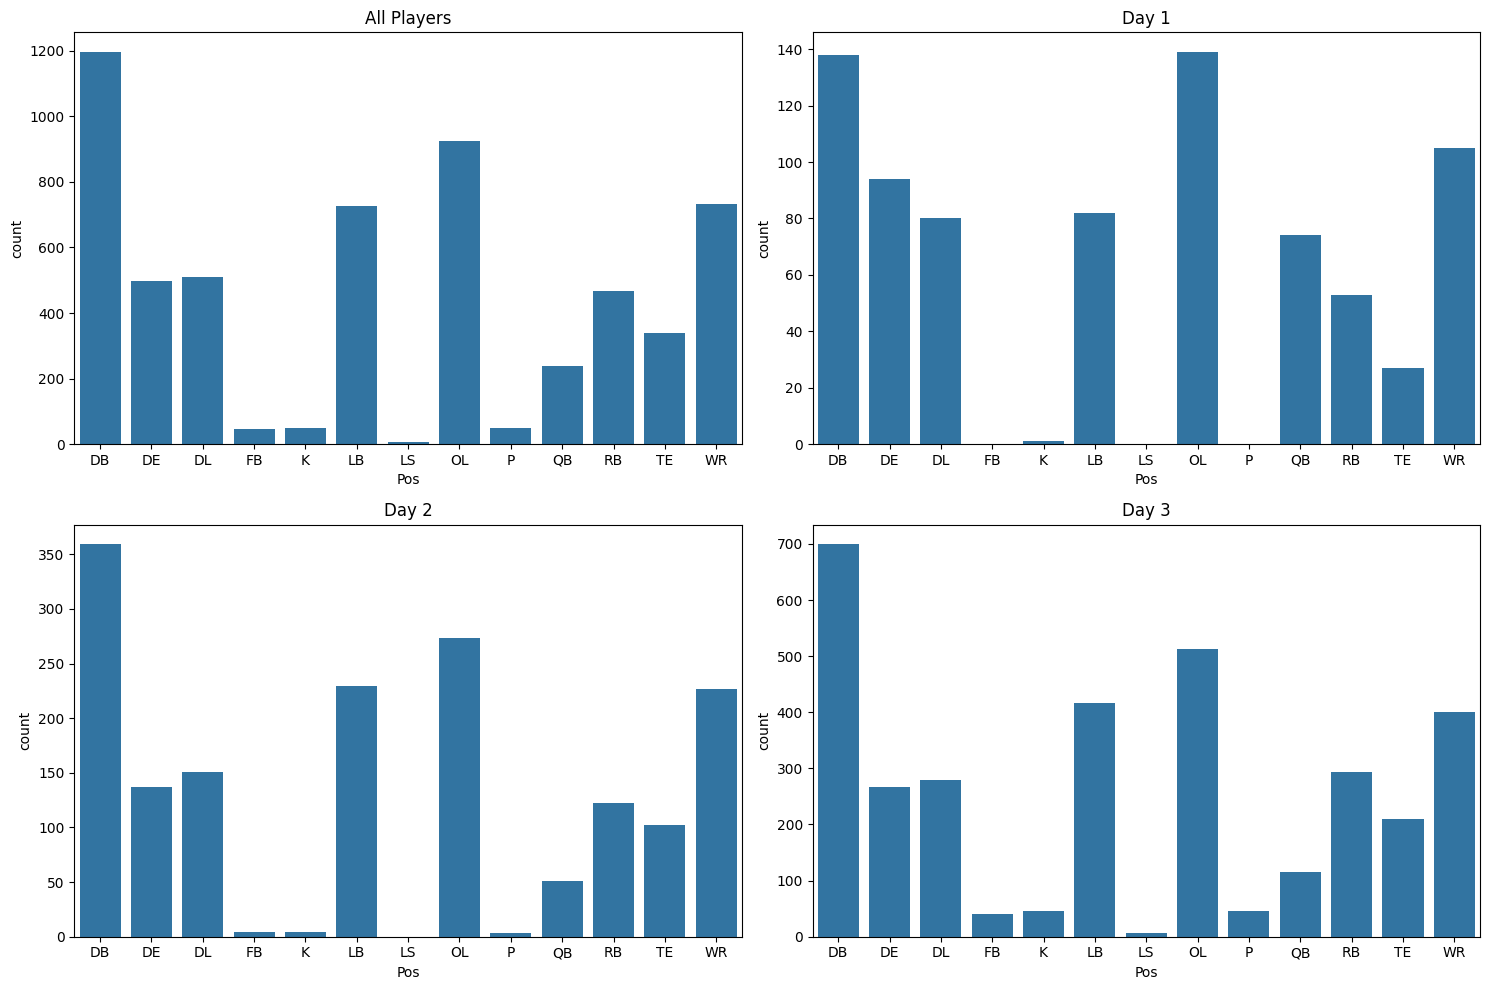

In [13]:
# subplots of players drafted on each day

fig, axs = plt.subplots(2, 2, figsize = (15, 10))

# all days
all = sns.countplot(x = "Pos", data = draft_data, ax = axs[0,0], order = sorted(draft_data["Pos"].unique()))
all.set_title("All Players")

# day 1
day1 = sns.countplot(x = "Pos", data = draft_data.query("Day == 1"), ax = axs[0,1], order = sorted(draft_data["Pos"].unique()))
day1.set_title("Day 1")

# day 2
day2 = sns.countplot(x = "Pos", data = draft_data.query("Day == 2"), ax = axs[1,0], order = sorted(draft_data["Pos"].unique()))
day2.set_title("Day 2")

# day 3
day3 = sns.countplot(x = "Pos", data = draft_data.query("Day == 3"), ax = axs[1,1], order = sorted(draft_data["Pos"].unique()))
day3.set_title("Day 3")

# show plots
plt.tight_layout()
plt.show()

### Picks by Round

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


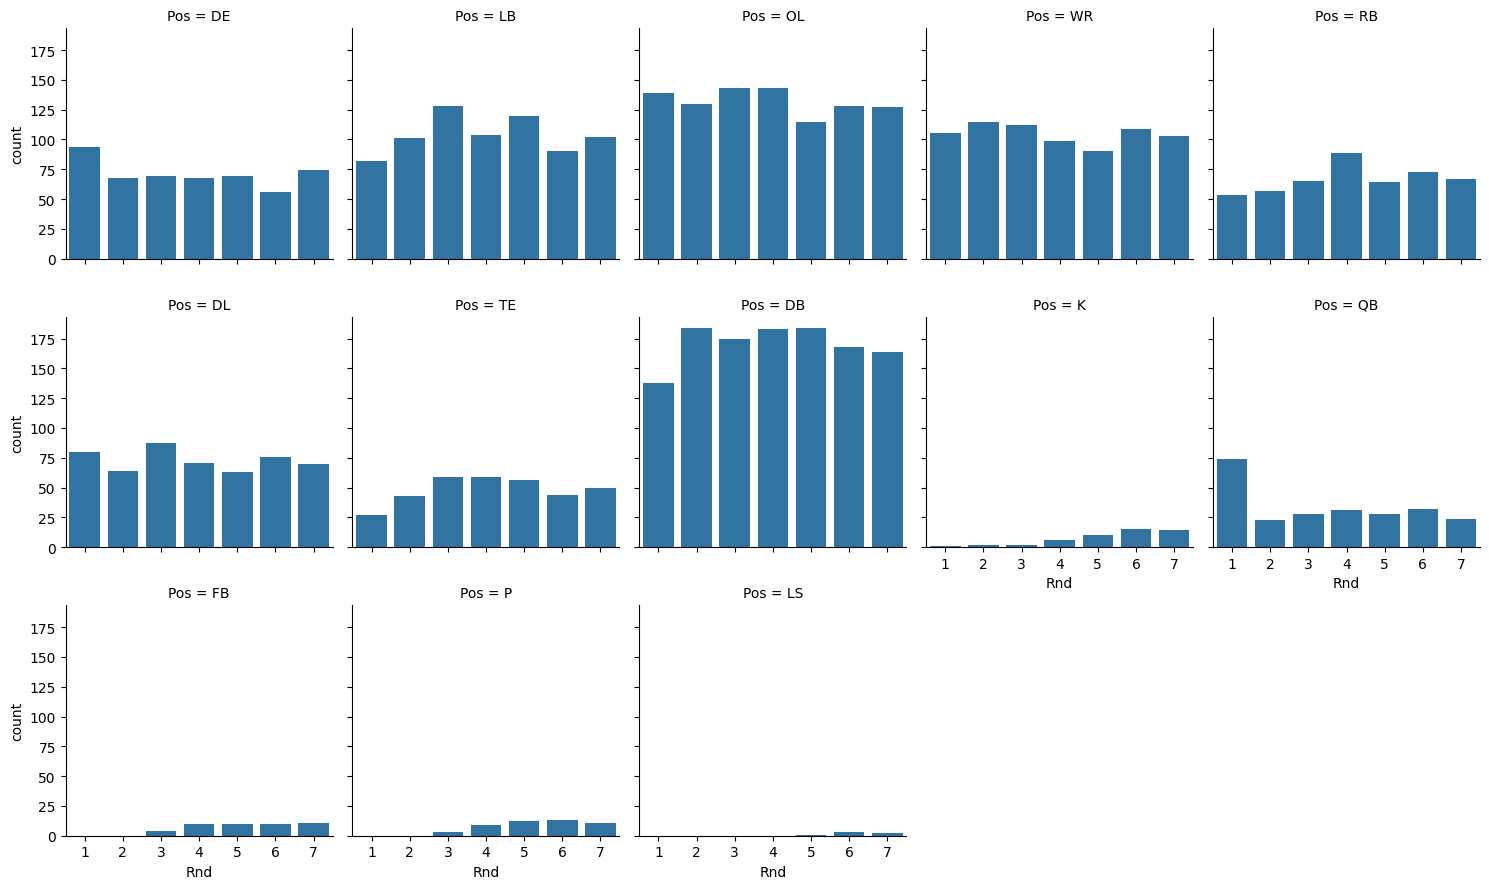

In [14]:
fp = sns.FacetGrid(draft_data, col = "Pos", col_wrap = 5)
fp.map(sns.countplot, "Rnd")
plt.tight_layout()
plt.show();

### Career

In [15]:
dd_round_career = draft_data.dropna(subset = ["DrAV"]).groupby("Rnd").agg(
        DrAV_mean = ("DrAV", "mean"),
        DrAV_median = ("DrAV", "median"),
        DrAV_std = ("DrAV", "std")
    )

dd_round_career

,DrAV_mean,DrAV_median,DrAV_std
Rnd,,,
1,28.754741,23.0,24.671831
2,17.819923,13.0,17.436462
3,11.808910,7.0,14.882318
4,9.522103,5.0,12.897871
5,7.071523,3.0,10.926335
6,5.381974,2.0,10.679025
7,4.771852,1.0,8.561600


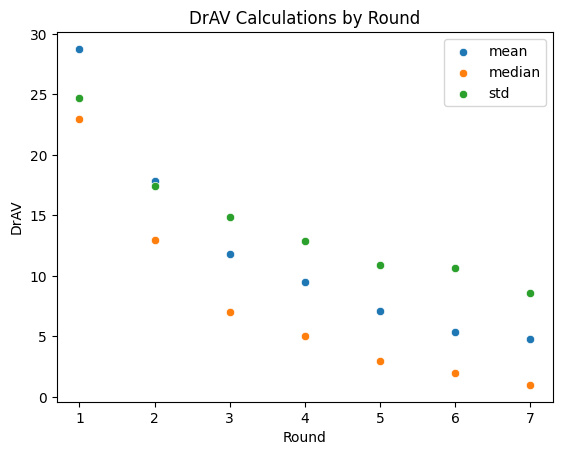

In [16]:
# plot mean DrAV by round
sns.scatterplot(x = "Rnd", y = "DrAV_mean", data = dd_round_career)

# plot median DrAV by round
sns.scatterplot(x = "Rnd", y = "DrAV_median", data = dd_round_career)

# plot std of DrAV by round
sns.scatterplot(x = "Rnd", y = "DrAV_std", data = dd_round_career)

# add legend
plt.legend(labels = ["mean", "median", "std"])
plt.title("DrAV Calculations by Round")
plt.xlabel("Round")
plt.ylabel("DrAV")

# show plot
plt.show()

## Part 3: Predictive Modeling

Predicting the weighted average (DrAV) for WRs by which round they were drafted.

### Plots

In [17]:
# get only WR data
wr_data = draft_data.query("Pos == 'WR'")

# remove na's in the DrAV columns
wr_data = wr_data.dropna(subset = ["DrAV"])

# show data
wr_data.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28,Year,last_3_yrs,Day
3,1,4,CIN,Peter Warrick,WR,23,2005,0,0,4,...,2991,18,3,NaN,NaN,Florida St.,College Stats,2000,0,1
7,1,8,PIT,Plaxico Burress,WR,23,2012,0,0,10,...,8499,64,NaN,NaN,NaN,Michigan St.,College Stats,2000,0,1
9,1,10,BAL,Travis Taylor,WR,22,2007,0,0,7,...,4017,22,NaN,NaN,NaN,Florida,College Stats,2000,0,1
20,1,21,KAN,Sylvester Morris,WR,22,2000,0,0,1,...,678,3,NaN,NaN,NaN,Jackson St.,NaN,2000,0,1
28,1,29,JAX,R. Jay Soward,WR,22,2000,0,0,0,...,154,1,NaN,NaN,NaN,USC,College Stats,2000,0,1


In [18]:
# plot DrAV by round selected

plot = px.scatter(wr_data, x = "Rnd", y = "DrAV",
                  title = "DrAV of WRs by Round",
                  labels={"Rnd": "Round", "DrAV": "Career Value (DrAV)"},
                  trendline = "ols", trendline_color_override = "red",
                  hover_data = {
                    "Rnd": True,
                    "DrAV": True,
                    "Player": True,
                    "Year": True
                  }
                  )

# show plotly plot
plot.show()

In [19]:
# plot DrAV by pick selected

plot = px.scatter(wr_data, x = "Pick", y = "DrAV",
                  title = "DrAV of WRs by Pick",
                  labels={"Pick": "Pick", "DrAV": "Career Value (DrAV)"},
                  trendline = "ols", trendline_color_override = "red",
                  hover_data = {
                    "Pick": True,
                    "DrAV": True,
                    "Player": True,
                    "Year": True
                  }
                  )

# show plotly plot
plot.show()

### Model

#### By Round

In [20]:
# separate data into training and testing sets

# get input and output variables
X = wr_data["Rnd"]
y = wr_data["DrAV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [21]:
# linear model of DrAV by Round
rnd_model = LinearRegression()

# fit model
rnd_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

# predictions
y_pred = rnd_model.predict(X_test.values.reshape(-1,1))

# flatten y_pred to be 1D
y_pred = y_pred.flatten()

# accuracy metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

# print metrics
print(f"MSE: {round(mse, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"MAE: {round(mae, 3)}")
print(f"R^2: {round(r2, 3)}")

MSE: 244.331
RMSE: 15.631
MAE: 10.004
R^2: 0.191


#### By Pick

In [22]:
# separate data into training and testing sets

# get input and output variables
X = wr_data["Pick"]
y = wr_data["DrAV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [23]:
# linear model of DrAV by pick
rnd_model = LinearRegression()

# fit model
rnd_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

# predictions
y_pred = rnd_model.predict(X_test.values.reshape(-1,1))

# flatten y_pred to be 1D
y_pred = y_pred.flatten()

# accuracy metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

# print metrics
print(f"MSE: {round(mse, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"MAE: {round(mae, 3)}")
print(f"R^2: {round(r2, 3)}")

MSE: 247.529
RMSE: 15.733
MAE: 10.106
R^2: 0.181


## Part 4: Analysis and Discussion

## Comparison of Models

**By Round**

MSE: 244.331

RMSE: 15.631

MAE: 10.004

R^2: 0.191

<br>

**By Pick**

MSE: 247.529

RMSE: 15.733

MAE: 10.106

R^2: 0.181

Based on the R^2 value and the MAE, the model using round as a predictor is better, but only slightly.  Neither model is great since their R^2 values are both very low.

### Improving the Model

If we color the model by whether or not a player was drafted recently (past 4 years) we can see that their DrAV value is much lower than someone who has been in the league longer.  If we exclude recently drafted players, our model will be more accurate.

In [24]:
# plot DrAV by round selected

plot = px.scatter(wr_data, x = "Rnd", y = "DrAV",
                  title = "DrAV of WRs by Round",
                  labels={"Rnd": "Round", "DrAV": "Career Value (DrAV)"},
                  trendline = "ols", trendline_color_override = "red",
                  hover_data = {
                    "Rnd": True,
                    "DrAV": True,
                    "Player": True,
                    "Year": True
                  },
                  color = "last_3_yrs",
                  color_discrete_map = {
                    0: "green",
                    1: "purple"
                  }
                  )

plot.update_layout(showlegend = False)

# show plotly plot
plot.show()

In [25]:
# plot DrAV by pick selected

plot = px.scatter(wr_data, x = "Pick", y = "DrAV",
                  title = "DrAV of WRs by Pick",
                  labels={"Pick": "Pick", "DrAV": "Career Value (DrAV)"},
                  trendline = "ols", trendline_color_override = "red",
                  hover_data = {
                    "Pick": True,
                    "DrAV": True,
                    "Player": True,
                    "Year": True
                  },
                  color = "last_3_yrs",
                  color_discrete_map = {
                    0: "green",
                    1: "purple"
                  }
                  )

plot.update_layout(showlegend = False)

# show plotly plot
plot.show()

### Improved Model

In [26]:
# get recent data on WRs
wr_data_recent = wr_data.query("last_3_yrs == '0'")

wr_data_recent.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28,Year,last_3_yrs,Day
3,1,4,CIN,Peter Warrick,WR,23,2005,0,0,4,...,2991,18,3,NaN,NaN,Florida St.,College Stats,2000,0,1
7,1,8,PIT,Plaxico Burress,WR,23,2012,0,0,10,...,8499,64,NaN,NaN,NaN,Michigan St.,College Stats,2000,0,1
9,1,10,BAL,Travis Taylor,WR,22,2007,0,0,7,...,4017,22,NaN,NaN,NaN,Florida,College Stats,2000,0,1
20,1,21,KAN,Sylvester Morris,WR,22,2000,0,0,1,...,678,3,NaN,NaN,NaN,Jackson St.,NaN,2000,0,1
28,1,29,JAX,R. Jay Soward,WR,22,2000,0,0,0,...,154,1,NaN,NaN,NaN,USC,College Stats,2000,0,1


In [27]:
# separate data into training and testing sets

# get input and output variables
X = wr_data_recent["Rnd"]
y = wr_data_recent["DrAV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [28]:
# linear model of DrAV by Round
rnd_model = LinearRegression()

# fit model
rnd_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

# predictions
y_pred = rnd_model.predict(X_test.values.reshape(-1,1))

# flatten y_pred to be 1D
y_pred = y_pred.flatten()

# accuracy metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

# print metrics
print(f"MSE: {round(mse, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"MAE: {round(mae, 3)}")
print(f"R^2: {round(r2, 3)}")

MSE: 199.137
RMSE: 14.112
MAE: 8.747
R^2: 0.31


### MLR Model

**Variables:**
* Round
* Age
* Games
* Yards
* Touchdowns

In [29]:
# separate data into training and testing sets

# get input and output variables
X = wr_data_recent[["Rnd", "Age", "G", "Yds", "TD"]]
y = wr_data_recent["DrAV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [30]:
# linear model of DrAV by Round, Age, G, Yds, TD
mlr_model = LinearRegression()

# fit model
mlr_model.fit(X_train.values, y_train.values)

# predictions
y_pred = mlr_model.predict(X_test.values)

# flatten y_pred to be 1D
y_pred = y_pred.flatten()

# accuracy metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

# print metrics
print(f"MSE: {round(mse, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"MAE: {round(mae, 3)}")
print(f"R^2: {round(r2, 3)}")

MSE: 139.863
RMSE: 11.826
MAE: 7.306
R^2: 0.515


In [31]:
# model summary

# add intercept
model_coefficients = pd.DataFrame(mlr_model.intercept_, ["Intercept"], columns = ["Coefficient"])

# append coefficients
model_coefficients = pd.concat([model_coefficients, pd.DataFrame(mlr_model.coef_.flatten(), X_train.columns, columns = ["Coefficient"])])

# print coefficients
model_coefficients

,Coefficient
Intercept,2.202778
Rnd,-1.168186
Age,-0.040729
G,0.258734
Yds,-0.017009
TD,0.446919


In [32]:
# model summary using statsmodels in order to get p-values

# add constant
X_train_sm = sm.add_constant(X_train)

# train model
mlr_model_sm = sm.OLS(y_train, X_train_sm)

# fit model
results = mlr_model_sm.fit()

# model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     123.4
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           5.70e-82
Time:                        16:06:20   Log-Likelihood:                -1765.0
No. Observations:                 455   AIC:                             3542.
Df Residuals:                     449   BIC:                             3567.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2028     14.313      0.154      0.878     -25.926      30.332
Rnd           -1.1682      0.314     -3.722      0.000      -1.785      -0.551
Age           -0.0407      0.646     -0.063      0.950      -1.310       1.229
G              0.2587      0.012     20.892      0.000       0.234       0.283
Yds           -0.0170      0.016     -1.086      0.278      -0.048       0.014
TD             0.4469      1.692      0.264      0.792      -2.879       3.772
==============================================================================
Omnibus:                      103.962   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              552.629
Skew:                           0.869   Prob(JB):                    9.96e-121
Kurtosis:                       8.112   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Findings

In order to see which predictors are most important for the multi-linear regression model, I trained a model using statsmodels as well as using Sci-Kit Learn.  As we can see in the above model summary, only *Rnd* and *G* (selected round and games played [college]) are significant predictors.  *Age*, *Yds*, and *TD* all had high p-values, indicating that they are not significant predictors.  The adjusted r-squared for the statsmodels model is 0.574, whereas the r-squared for the sk-learn model is 0.514.  Both are much greater than the previously made SLR model which had a r-squared of 0.31.

<br>

This model could be improved by adding in other factors such as combine data (40 yard dash, 3 cone, vertical, etc.), what school they went to in college (P5/G5, record, team talent score), or previous injury data.

<br>

There was some bias in the data where players who were drafted recently were influencing the DrAV by making it lower because the players haven't played as many games as players with a longer career.  After filtering out the recently drafted players, there are not any glaring biases in this model.